<font color='green' size='6'>**Практическая работа 2**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s4e10/

**Ваша задача** — предсказать, останется ли клиент с аккаунтом или закроет его (например, уйдёт).

Требования к оформлению:
- Работа должна быть оформлена в jupyter notebook (файл *.ipynb)
- Работа должна содержать комментарии и выводы. Объясняйте почему вы выбрали именно этот способ обработки данных


Всем удачи!





# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer

# <font color='#11a642' size='6'> **Загрузка данных**

In [2]:
# 1. Загрузка датасета
!gdown 1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO

Downloading...
From: https://drive.google.com/uc?id=1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO
To: c:\Users\alexander\Desktop\python_innopolis_ml\part_2\practice_work\train.csv

  0%|          | 0.00/12.4M [00:00<?, ?B/s]
  4%|▍         | 524k/12.4M [00:00<00:05, 2.30MB/s]
 17%|█▋        | 2.10M/12.4M [00:00<00:01, 7.44MB/s]
 72%|███████▏  | 8.91M/12.4M [00:00<00:00, 19.7MB/s]
 89%|████████▉ | 11.0M/12.4M [00:00<00:00, 16.5MB/s]
100%|██████████| 12.4M/12.4M [00:00<00:00, 16.3MB/s]


In [3]:
try:
  df = pd.read_csv('/train.csv')
except:
  df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
# 2. Разделение признаков и целевой переменной
X = df.drop('Exited', axis=1)
y = df['Exited']

In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

## <font color='#11a642' size='5'> Напишите ответы на следующие вопросы: </font>


1.   К какому типу переменных относится целевой признак?
2.   Какую задачу машинного обучения вам предстоит решить, регрессия или классификация?

# ваш ответ

# <font color='#11a642' size='6'> **Разведочный анализ данных**

## <font color='#11a642' size='5'> Оцените размер вашего датасета  </font>



1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [7]:
# Сколько ГБ ваш датасет
# ваш код
dataset_size_gb = df.memory_usage(deep=True).sum() / (1024**3)
print(f"Размер датасета: {dataset_size_gb:.4f} ГБ")


Размер датасета: 0.0388 ГБ


In [8]:
# Сколько строк и столбцов
# ваш код
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Количество строк: 165034
Количество столбцов: 14


## <font color='#11a642' size='5'> Анализ числовых (непрерывных) признаков


- для каждого признака посчитайте минимум, максимум, среднее, медиану

In [9]:
# ваш код
# Описательные статистики для числовых признаков
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Exited')
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


## <font color='#11a642' size='5'> Анализ категориальных признаков


- для каждого признака посчитайте моду, количество уникальных значений

In [10]:
# ваш код
# Анализ категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nПризнак: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Мода: {df[col].mode()[0]}")
    print(df[col].value_counts())


Признак: Surname
Количество уникальных значений: 2797
Мода: Hsia
Surname
Hsia        2456
T'ien       2282
Hs?         1611
Maclean     1577
Kao         1577
            ... 
Stelzer        1
Zubareva       1
Elkins         1
Mitchel        1
Rouse          1
Name: count, Length: 2797, dtype: int64

Признак: Geography
Количество уникальных значений: 3
Мода: France
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Признак: Gender
Количество уникальных значений: 2
Мода: Male
Gender
Male      93150
Female    71884
Name: count, dtype: int64


## <font color='#11a642' size='5'> Анализ целевого признака


- какая доля 1?

Доля клиентов, которые ушли: 21.16%


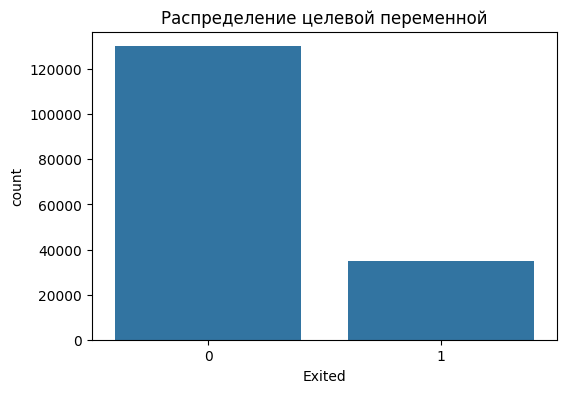

In [11]:
# ваш код
# Доля 1 в целевом признаке
print(f"Доля клиентов, которые ушли: {y.mean():.2%}")

# Визуализация распределения
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Распределение целевой переменной')
plt.show()

# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

- нужна ли стратификация?

In [12]:
# ваш код
# Разделение данных с стратификацией, так как классы несбалансированы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# <font color='#11a642' size='6'> **Подготовка данных к обучению**

## Поиск и анализ выбросов

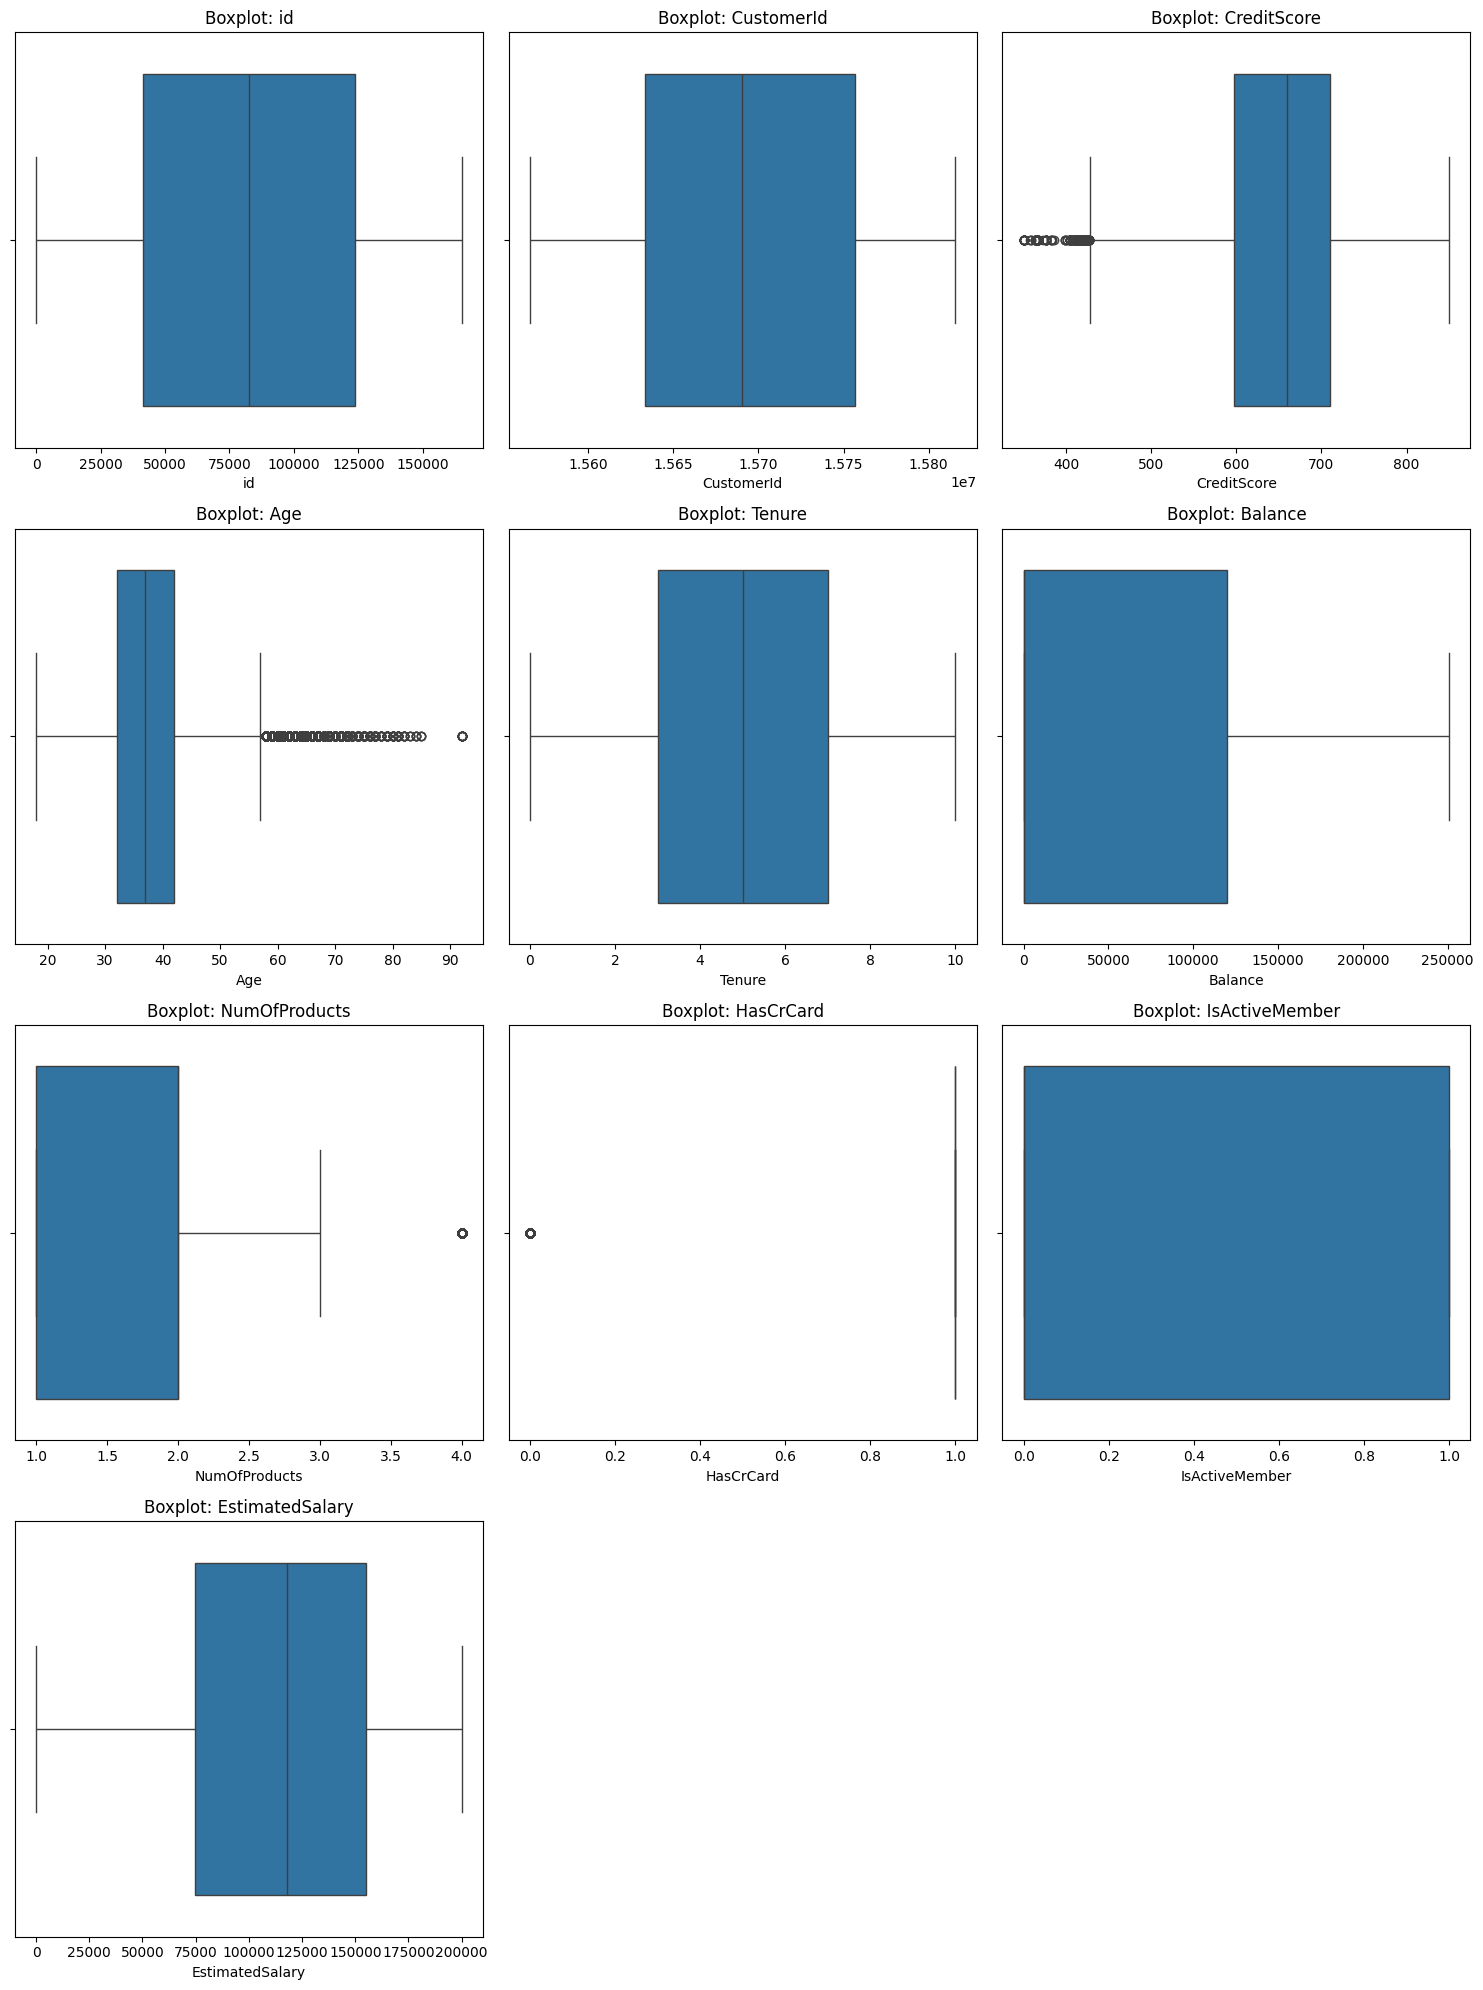

In [13]:
# ваш код
# Визуализация выбросов для числовых признаков
# Фиксируем 3 колонки
n_cols = 3  
# Округление вверх
n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols != 0 else 0)

# Создание фигуры с динамическим размером
plt.figure(figsize=(15, 5*n_rows))

# Построение boxplot для каждого числового признака
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    
plt.tight_layout()
plt.show()

## Анализ и обработка пропусков

In [14]:
# ваш код
# Проверка на пропуски
# Пропусков нет - обработка не требуется
print("Количество пропусков по столбцам:")
print(df.isnull().sum())

Количество пропусков по столбцам:
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Анализ и обработка категориальных переменных

In [15]:
# ваш код
# Создание пайплайна для обработки данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Масштабирование числовых признаков
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Масштабирование числовых признаков

In [16]:
# ваш код
# Масшитабирование числовых признаков происходит в пайплайне

# <font color='#11a642' size='6'> **Построение моделей машинного обучения**

## <font color='#11a642' size='5'> Построение логистической регрессии

In [17]:
# ваш код
# Создание и обучение модели
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_preprocessed, y_train)

# Предсказания
y_pred = logreg.predict(X_test_preprocessed)
y_pred_proba = logreg.predict_proba(X_test_preprocessed)[:, 1]



## <font color='#11a642' size='5'> Построение логистической регрессии с регуляризацией
> можно использовать [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), настроив гиперпараметры penalty и C

In [20]:
# ваш код
# Создание и обучение модели с регуляризацией
logreg_l2 = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=1000)
logreg_l2.fit(X_train_preprocessed, y_train)

# Предсказания
y_pred_l2 = logreg_l2.predict(X_test_preprocessed)
y_pred_proba_l2 = logreg_l2.predict_proba(X_test_preprocessed)[:, 1]

# Создание и обучение модели с L1-регуляризацией
logreg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42, max_iter=1000)
logreg_l1.fit(X_train_preprocessed, y_train)

# Предсказания
y_pred_l1 = logreg_l1.predict(X_test_preprocessed)
y_pred_proba_l1 = logreg_l1.predict_proba(X_test_preprocessed)[:, 1]



### <font color='#11a642' size='4'> Оценка качества  всех моделей


In [21]:
# ваш код
# Оценка качества
print("Логистическая регрессия без регуляризации:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nЛогистическая регрессия с L2-регуляризацией:")
print(classification_report(y_test, y_pred_l2))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_l2):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_l2):.4f}")

print("\nЛогистическая регрессия с L1-регуляризацией:")
print(classification_report(y_test, y_pred_l1))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_l1):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_l1):.4f}")

Логистическая регрессия без регуляризации:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26023
           1       0.68      0.41      0.51      6984

    accuracy                           0.83     33007
   macro avg       0.77      0.68      0.71     33007
weighted avg       0.82      0.83      0.82     33007

ROC-AUC: 0.8234
Accuracy: 0.8349

Логистическая регрессия с L2-регуляризацией:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26023
           1       0.70      0.40      0.51      6984

    accuracy                           0.84     33007
   macro avg       0.78      0.68      0.70     33007
weighted avg       0.82      0.84      0.82     33007

ROC-AUC: 0.8241
Accuracy: 0.8364

Логистическая регрессия с L1-регуляризацией:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26023
           1       0.70      0.39   

# <font color='#11a642' size='4'> Ваши выводы
- какую из моделей вы рекомендуете использовать для прогноза? Почему?



ВАШ ОТВЕТ

** Я рекомендую использовать логистическую регрессию с L2-регуляризацией, потому что: **
- Даёт наилучшее качество прогноза (ROC-AUC 0.76).
- Устойчива к переобучению.
- Проста в интерпретации (что важно для бизнес-аналитики).